In [153]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Carga y estudio de la estructura del dataset

In [154]:
# Cargamos el dataset
data = pd.read_csv('loan_data.csv')

# Mostramos informacion relevante de las columnas 

#Mostramos la cantidad de registros y columnas
print(data.shape)

#Mostramos los tipos de datos de las columnas
print(data.info())

#Mostramos la cantidad de valores nulos por columna
print(data.describe())

# Mostramos los primeros 5 registros
print("Mostrar los primeros 5 registros")
print(data.head())

#Guardamos la variable de target
target = 'loan_status'

(45000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45000 non-null  float64
 1   gender            45000 non-null  object 
 2   education         45000 non-null  object 
 3   income            45000 non-null  float64
 4   yrs_exp           45000 non-null  int64  
 5   ownership         45000 non-null  object 
 6   amount            45000 non-null  float64
 7   purpose           44962 non-null  object 
 8   int_rate          45000 non-null  float64
 9   percent_income    45000 non-null  float64
 10  cred_hist_length  45000 non-null  float64
 11  risk_score        45000 non-null  int64  
 12  previous_loans    45000 non-null  object 
 13  loan_status       45000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.8+ MB
None
                age        income       yrs_exp        amoun

Nota para el cliente: Gracias ha este analisis exploratorio de los datos hemos podido observar que contamos con datos erroneos como por ejemplo una persona con una edad de **144 años**, otra
con una experiencia laboral de **125 años** y otra con una puntuacion de riesgo de **77710** que desvirtua los datos, por lo que en futuros pasos se procedera a limpiar los datos antes de realizar el analisis de los mismos.

### 2. Limpieza de datos (data cleaning)
- 2.1 Deteccion de valores nulos
- 2.2 Deteccion de valores erroneos
- 2.4 Deteccion de valores erroneso mediante graficas y z-score
- 2.5 Aplicacion de tecnicas limpieza (borrado de datos, aplicacion de medias...)

In [155]:
#Deteccion de valores nulos
#Mostramos la cantidad de valores nulos por columna
null_values = data.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna")
print(null_values)

#Deteccion de valores erroneos, indicando los valores unicos de las columnas categoricas
#Mostramos los valores unicos de cada columnas categoricas
print("Valores unicos de cada columna categoricas")
for column in data.select_dtypes(include='object').columns:
    print(column, data[column].unique())


#Cantidad de filas con valor 'femal' en la columna
print("Cantidad de filas erroneas")
rows_wrong_gender = data[data['gender'] == 'femal'].shape[0]

#Cantidad de filas con valor 'OWN ' en la columna
rows_wrong_ownership = data[data['ownership'] == 'OWN '].shape[0]

#Cantidad de filas con valor nan en la columna
rows_wrong_purpose = data[data['purpose'].isnull()].shape[0]

#Calculamos porcentaje total de valores erroneos
total_rows = data.shape[0]
total_wrong_rows = (rows_wrong_gender + rows_wrong_ownership + rows_wrong_purpose * 100) / total_rows
print("El total de filas erroneas es: ", round(total_wrong_rows,4), "%")


Cantidad de valores nulos por columna
purpose             38
age                  0
gender               0
education            0
income               0
yrs_exp              0
ownership            0
amount               0
int_rate             0
percent_income       0
cred_hist_length     0
risk_score           0
previous_loans       0
loan_status          0
dtype: int64
Valores unicos de cada columna categoricas
gender ['female' 'male' 'femal']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'OWN ']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION' nan]
previous_loans ['No' 'Yes']
Cantidad de filas erroneas
El total de filas erroneas es:  0.0845 %


### Aplicacion de tecnicas de limpieza de datos

In [156]:
#Limpieza de datos nulos y erroneos
#Eliminamos las filas con valores nulos
data_clean = data.dropna()

#Corroboramos que se hayan eliminado los valores nulos
null_values = data_clean.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna")
print(null_values)

#Tranformamos los valores erroneos de la columnas categoricas
data_clean = data_clean.replace({'femal': 'female'})
data_clean = data_clean.replace({'OWN ': 'OWN'})

#Corroboramos que se hayan modificado los valores erroneos de las columnas categoricas
print("Valores unicos de cada columna categoricas")
for column in data_clean.select_dtypes(include='object').columns:
    print(column, data_clean[column].unique())


Cantidad de valores nulos por columna
age                 0
gender              0
education           0
income              0
yrs_exp             0
ownership           0
amount              0
purpose             0
int_rate            0
percent_income      0
cred_hist_length    0
risk_score          0
previous_loans      0
loan_status         0
dtype: int64
Valores unicos de cada columna categoricas
gender ['female' 'male']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loans ['No' 'Yes']


### Deteccion de valores atipicos mediante graficas


Index(['age', 'income', 'yrs_exp', 'amount', 'int_rate', 'percent_income',
       'cred_hist_length', 'risk_score', 'loan_status'],
      dtype='object')


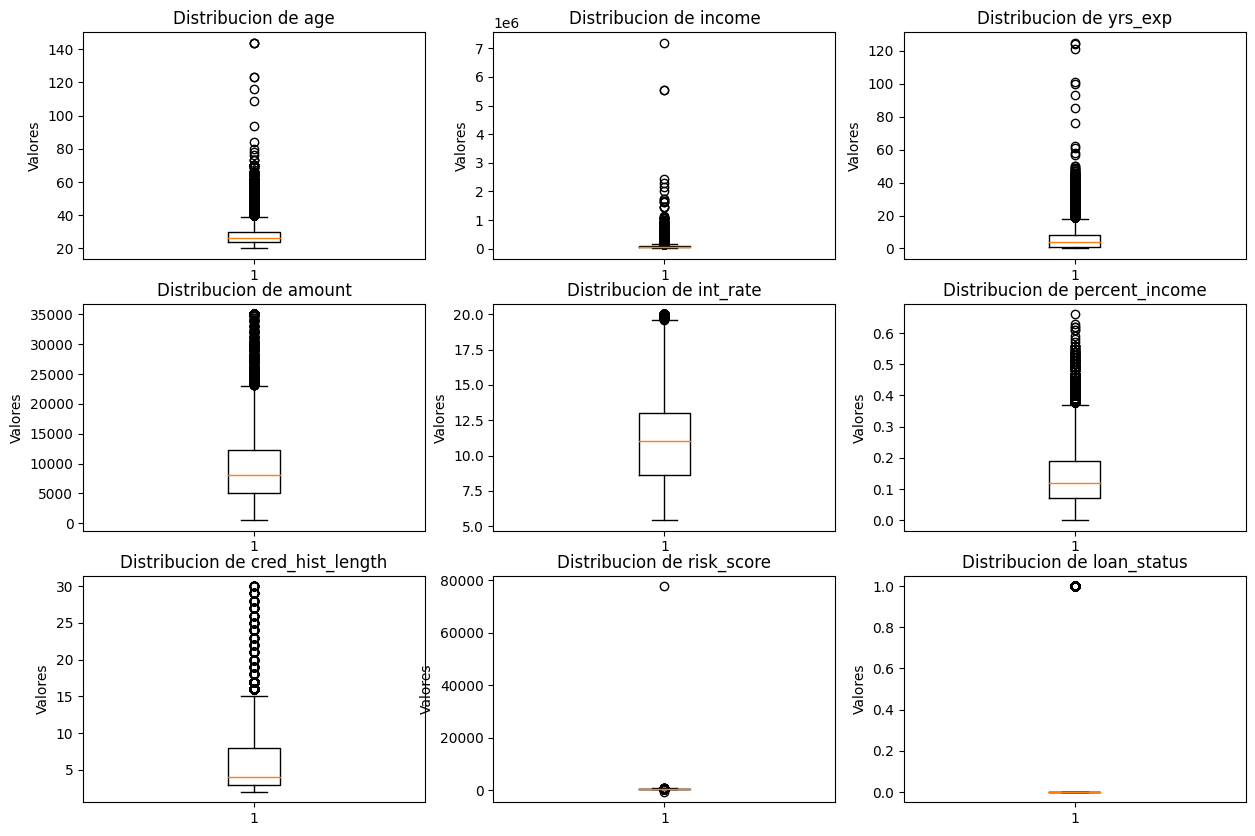

In [157]:
categories = data_clean.select_dtypes(include='number').columns
print(categories)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

#Graficamos la distribucion de las variables numericas
for i, var in enumerate(categories):
    axes[i].boxplot(data_clean[var])
    axes[i].set_title(f"Distribucion de {var}")
    axes[i].set_ylabel("Valores")

for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.show()

📝 Nota para el cliente: Gracias a estas graficas hemos podido observar que tenemos un par de clientes con edades y años de experiencia laboral comprendidos en un rango que 
que no se ajustan a la realidad, en los siguientes pasos detallaremos el proceso de limpieza de dichos datos.
- Ya que son pocos datos respecto al total de filas hemos decidido lo siguiente:
1. La edad maxima de los clientes sera de 100 años
2. Los años de experiencia laboral maxima seran de 51 años (Edad minima para entrar a trabajar - Edad de jubilacion) Ej: 67 - 16 = 51 años
3. Eliminamos outliers de la columna de risk-score que desvirtuan la realidad de los datos

In [158]:
#Calculamos el porcentaje de valores atipicos en las columnas age y yrs_exp
total_rows = data_clean.shape[0]

#Obtenemos valores atipicos de la columna risk_score
media_risk_score = data_clean['risk_score'].mean()
std_risk_score = data_clean['risk_score'].std()
outliers = []

for element in data_clean['risk_score'].values:
    z = abs(element - media_risk_score) / std_risk_score
    if z > 2:
        outliers.append(element)

#Calculamos el porcentaje de valores atipicos en las columnas age, yrs_exp y risk_score
total_outliers = (data_clean[data_clean['age'] > 100].shape[0] + data_clean[data_clean['yrs_exp'] > 51].shape[0] + len(outliers)) * 100 / total_rows
print("El total de valores atipicos es: ", round(total_outliers,4), "%")
print("Cantidad de datos antes de la limpieza: ", data_clean.shape)

# Eliminar valores atípicos de las columnas age y yrs_exp
data_clean = data_clean[data_clean['age'] <= 120]
data_clean = data_clean[data_clean['yrs_exp'] <= 51]

#Eliminamos los valores atipicos de la columna risk_score con z-score
data_clean = data_clean[~data_clean['risk_score'].isin(outliers)]

#Corroboramos que se hayan eliminado los valores atipicos
print("Cantidad de datos despues de la limpieza: ", data_clean.shape)

El total de valores atipicos es:  0.0467 %
Cantidad de datos antes de la limpieza:  (44962, 14)
Cantidad de datos despues de la limpieza:  (44948, 14)


### 3. Ingeniería de características
Una vez hemos realizado la limpieza de datos vamos a codificar y escalar nuestros datos siguiendo los siguientes pasos:
1. Conversion de columnas categoricas al tipo 'category' y de la columna 'age' a entero

In [ ]:
# Convertir la columna age a tipo entero
data_clean['age'] = data_clean['age'].astype(int)
# Convertir todas las columnas categóricas object a tipo category
data_clean[data_clean.select_dtypes(['object']).columns] = data_clean.select_dtypes(['object']).astype('category')

print(data_clean.head())

# print(data_encoded.head())

# #Codificamos las columnas categoricas
# data_encoded = 
# data_encoded = pd.get_dummies(data_clean, columns=['purpose', 'ownership'])

# #Mostramos la cantidad de columnas despues de la codificacion
# print("Cantidad de columnas despues de la codificacion: ", data_encoded.shape[1])

# print(data_encoded.head())






   age  gender    education   income  yrs_exp ownership   amount    purpose  \
0   22  female       Master  71948.0        0      RENT  35000.0   PERSONAL   
1   21  female  High School  12282.0        0       OWN   1000.0  EDUCATION   
2   25  female  High School  12438.0        3  MORTGAGE   5500.0    MEDICAL   
3   23  female     Bachelor  79753.0        0      RENT  35000.0    MEDICAL   
4   24    male       Master  66135.0        1      RENT  35000.0    MEDICAL   

   int_rate  percent_income  cred_hist_length  risk_score previous_loans  \
0     16.02            0.49               3.0         561             No   
1     11.14            0.08               2.0         504            Yes   
2     12.87            0.44               3.0         635             No   
3     15.23            0.44               2.0         675             No   
4     14.27            0.53               4.0         586             No   

   loan_status  
0            1  
1            0  
2            1  
